This workbook is for extracting WK255 data and recreating the plots.

File structure: 
```
(root)
├── src
│    └── Python Test.ipynb
└── wairakei_data
     └── Liquid wells (version 1).xlsx
```

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if not xl:
    xl = pd.ExcelFile('../wairakei_data/Liquid wells (version 1).xlsx')
print(xl.sheet_names[:5], '...')

['WK26A', 'WK26A trend ', 'WK26A trend  (2)', 'WK26B', 'WK26B trend '] ...


In [58]:
# remove rows at end
df = xl.parse('wk255')
df = df.loc[:, ~df.columns.str.contains('^Unnamed|SUMMARY')]
df['mf'] = pd.to_numeric(df['mf'], errors='coerce')
df = df[pd.notnull(df['date'])]
print(df.head())

        date        whp          mf            h      mf eqn     h eqn  \
0 2008-12-18  13.028442  507.776080  1030.000000  508.479408       NaN   
1 2008-12-18  14.841479  283.165920  1030.000000  258.880938       NaN   
2 2008-12-18  14.939021  208.716385  1030.000000  236.661124       NaN   
3 2009-04-08  13.466667  498.071714  1054.230235  495.384693  1051.888   
4 2009-04-08  13.800000  457.879864  1040.519288  462.216261  1044.108   

          diff       whp^2           MF^2  slope  intercept  
0 -1030.000000  169.740297  257836.547309    NaN        NaN  
1 -1030.000000  220.269504   80182.938430    NaN        NaN  
2 -1030.000000  223.174343   43562.529173    NaN        NaN  
3    -2.342235  181.351111  248075.432672    NaN        NaN  
4     3.588712  190.440000  209653.969408    NaN        NaN  


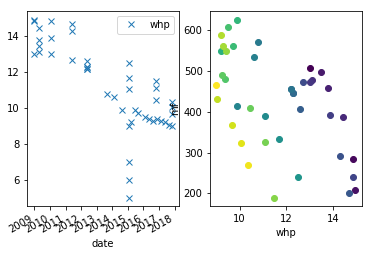

In [84]:
# create exploratory plots

cmap = plt.get_cmap('viridis')
indices = np.linspace(0, cmap.N, len(df))
my_colors = [cmap(int(i)) for i in indices]

fig, (ax1, ax2) = plt.subplots(1,2)

df.plot('date', 'whp', style='x', ax=ax1)
ax1.set_xlabel('date')
ax2.set_ylabel('whp')

for i, idx in enumerate(df.index):
    ax2.plot(df.loc[idx, 'whp'], df.loc[idx, 'mf'], 'o', color=my_colors[i])
# df.plot('whp', 'mf', ax=ax2, style='o')
ax2.set_xlabel('whp')
ax2.set_ylabel('mf')
plt.show()